In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('success')

success


In [39]:
df = pd.read_excel('C:/Users/NHQ/Desktop/MindX Test/data/Home Values.xlsx')
#df = pd.read_excel('C:/Users/quan.nguyen/Desktop/data/Home Values.xlsx')


In [40]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [41]:
df.head()

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
1,Alabama,117600,42081,22984,71.1
2,Alaska,229100,66521,30726,64.7
3,Arizona,215000,50448,25680,67.4
4,Arkansas,102300,39267,21274,67.7
5,California,458500,60883,29188,57.4


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          51 non-null     object
 1   Home Value     51 non-null     object
 2   HH Inc         51 non-null     object
 3   Per Cap Inc    51 non-null     object
 4   Pct Owner Occ  51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [43]:
df = df.astype({'Home Value':'int','HH Inc':'int','Per Cap Inc':'int','Pct Owner Occ':'float64'})

In [44]:
df.head()

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
1,Alabama,117600,42081,22984,71.1
2,Alaska,229100,66521,30726,64.7
3,Arizona,215000,50448,25680,67.4
4,Arkansas,102300,39267,21274,67.7
5,California,458500,60883,29188,57.4


# Calculate mean, median, std using aggregate function

In [45]:
df2 = df.set_index('State')

In [46]:
df2 = df2.aggregate(['mean','median','std'])

In [47]:
df2

,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
mean,204107.843137,51776.392157,26983.196078,67.868627
median,173300.000000,49424.000000,25803.000000,69.200000
std,98746.566205,8357.417659,4329.312929,5.376857


### Exchange columns and indexes

In [48]:
temp = df2.transpose()

In [49]:
temp

,mean,median,std
0,,,
Home Value,204107.843137,173300.0,98746.566205
HH Inc,51776.392157,49424.0,8357.417659
Per Cap Inc,26983.196078,25803.0,4329.312929
Pct Owner Occ,67.868627,69.2,5.376857


### Using for loop to calculate range (= max - min)

In [50]:
columns = df2.columns
columns =list(df2.columns)

In [51]:
a = []
for i in columns:
    b = df[i].max() - df[i].min()
    a.append(b)

In [52]:
temp['range'] = a

In [53]:
temp.index.name = ''

### Question 1 Result

In [54]:
temp

,mean,median,std,range
,,,,
Home Value,204107.843137,173300.0,98746.566205,442900.0
HH Inc,51776.392157,49424.0,8357.417659,32766.0
Per Cap Inc,26983.196078,25803.0,4329.312929,22101.0
Pct Owner Occ,67.868627,69.2,5.376857,31.1


In [55]:
df.describe()

,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
count,51.000000,51.000000,51.000000,51.000000
mean,204107.843137,51776.392157,26983.196078,67.868627
std,98746.566205,8357.417659,4329.312929,5.376857
min,94500.000000,37881.000000,19977.000000,43.500000
25%,126950.000000,46315.500000,23947.000000,67.050000
50%,173300.000000,49424.000000,25803.000000,69.200000
75%,252900.000000,56849.500000,29097.500000,70.900000
max,537400.000000,70647.000000,42078.000000,74.600000


# Histogram

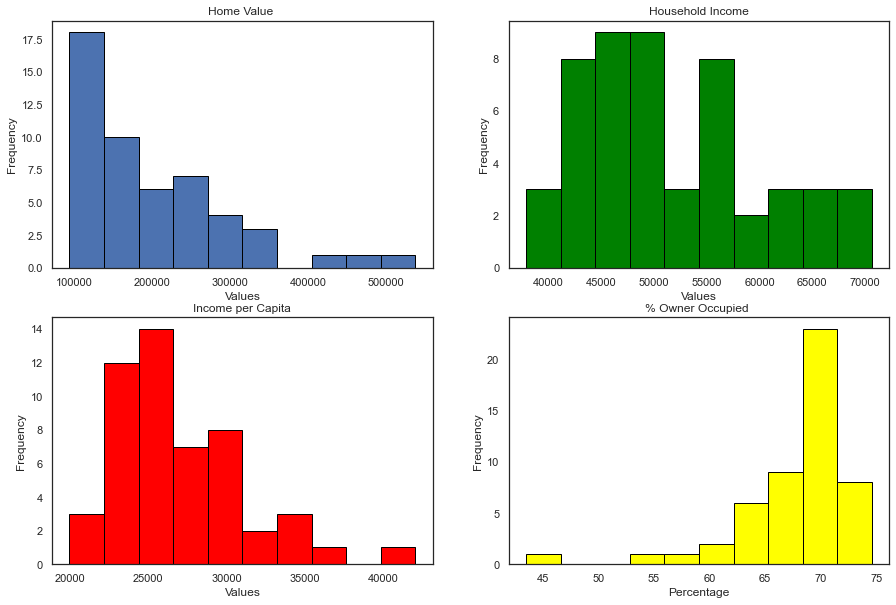

In [56]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

ax1.hist(df['Home Value'], bins = 10,edgecolor ='black')
ax2.hist(df['HH Inc'], bins =10, color= 'green', edgecolor ='black')
ax3.hist(df['Per Cap Inc'], bins =10, color= 'red', edgecolor ='black')
ax4.hist(df['Pct Owner Occ'], bins =10, color= 'yellow', edgecolor ='black')

ax1.title.set_text('Home Value ')
ax2.title.set_text('Household Income')
ax3.title.set_text('Income per Capita')
ax4.title.set_text('% Owner Occupied ')

ax1.set_xlabel('Values')
ax2.set_xlabel('Values')
ax3.set_xlabel('Values')
ax4.set_xlabel('Percentage')

ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency')
ax4.set_ylabel('Frequency')
plt.show()




# Boxplot 

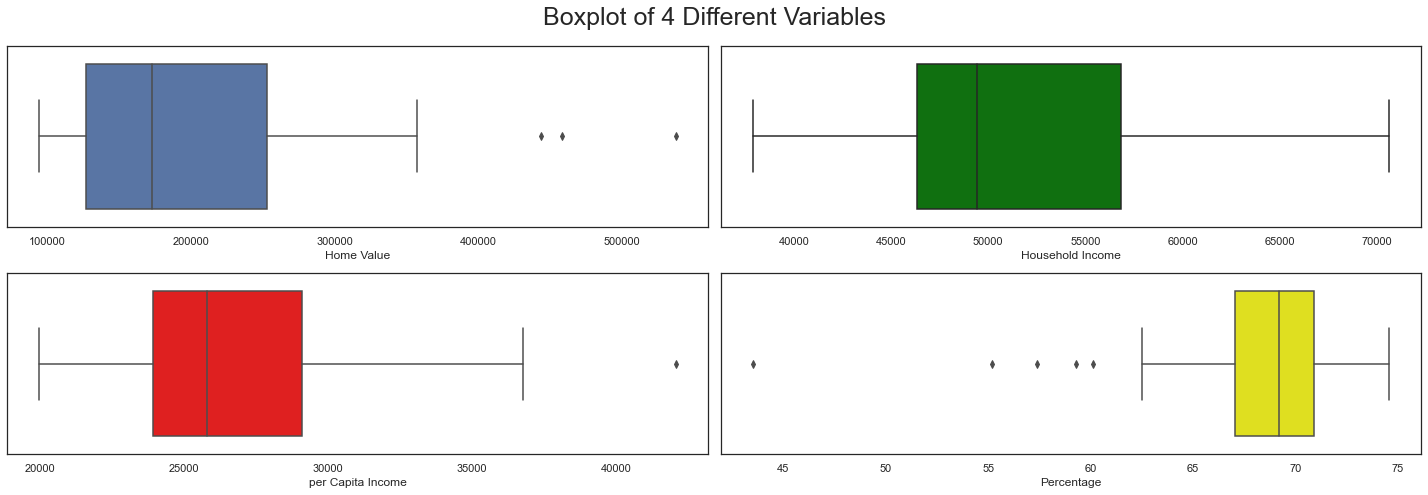

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#setup suplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(20,7))

#change theme
sns.set_theme(style ='white')
#create boxplot in each subplot
sns.boxplot(data=df, x='Home Value', ax = ax1).set(xlabel='Home Value')
sns.boxplot(data=df, x='HH Inc', ax = ax2, color = 'green').set(xlabel='Household Income')
sns.boxplot(data=df, x='Per Cap Inc', ax = ax3, color = 'red').set(xlabel='per Capita Income')
sns.boxplot(data=df, x='Pct Owner Occ', ax =ax4, color = 'yellow').set(xlabel='Percentage')
#Add Title
fig.suptitle('Boxplot of 4 Different Variables', fontsize=25)
plt.tight_layout()
plt.show()

# Scatter Plot

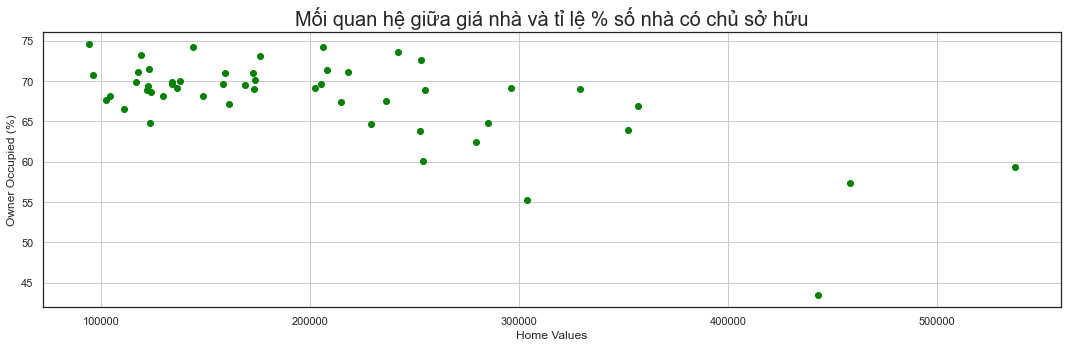

In [58]:
#Plot
fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,5)) 

xs = df['Home Value']
ys = df['Pct Owner Occ']

# Plot
ax1.scatter(xs,ys, color ='green')

plt.xlabel("Home Values")
plt.ylabel("Owner Occupied (%)")
plt.title('Mối quan hệ giữa giá nhà và tỉ lệ % số nhà có chủ sở hữu', fontsize= 20)
plt.grid()
plt.tight_layout()
plt.show()

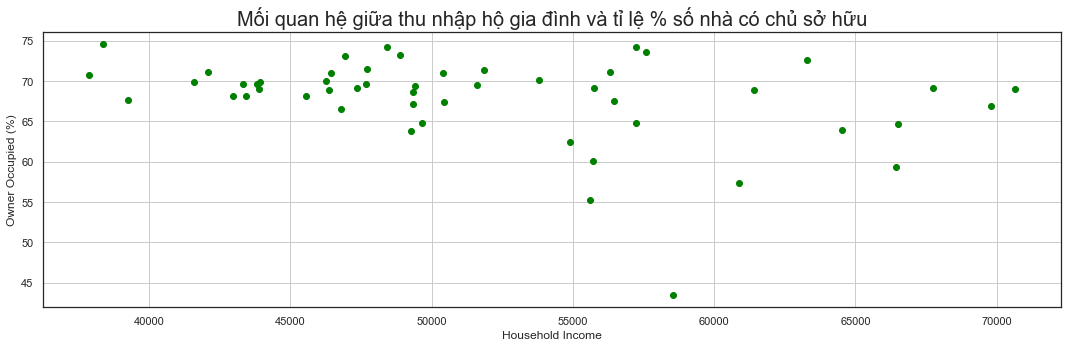

In [59]:
#setup
fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,5)) 

xs = df['HH Inc']
ys = df['Pct Owner Occ']

# Plot
ax1.scatter(xs,ys, color ='green')

plt.xlabel("Household Income")
plt.ylabel("Owner Occupied (%)")
plt.title('Mối quan hệ giữa thu nhập hộ gia đình và tỉ lệ % số nhà có chủ sở hữu', fontsize= 20)
plt.grid()
plt.tight_layout()
plt.show()

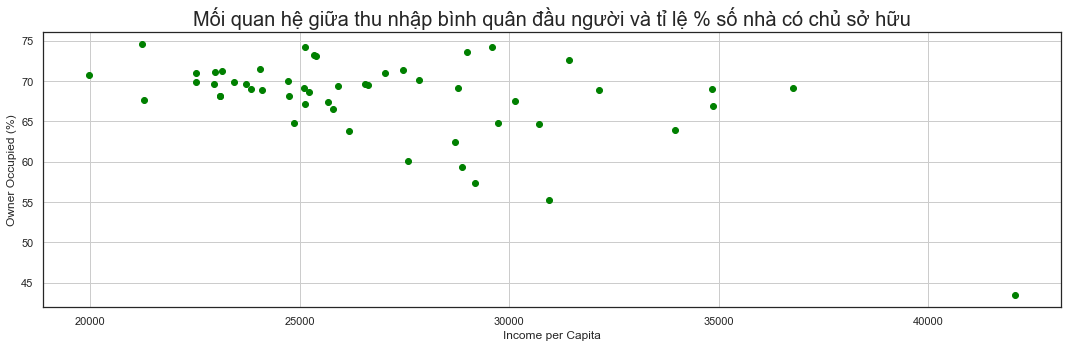

In [60]:
#setup
fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,5)) 

xs = df['Per Cap Inc']
ys = df['Pct Owner Occ']

# Plot
ax1.scatter(xs,ys, color ='green')

plt.xlabel("Income per Capita")
plt.ylabel("Owner Occupied (%)")
plt.title('Mối quan hệ giữa thu nhập bình quân đầu người và tỉ lệ % số nhà có chủ sở hữu', fontsize= 20)
plt.grid()
plt.tight_layout()
plt.show()
 



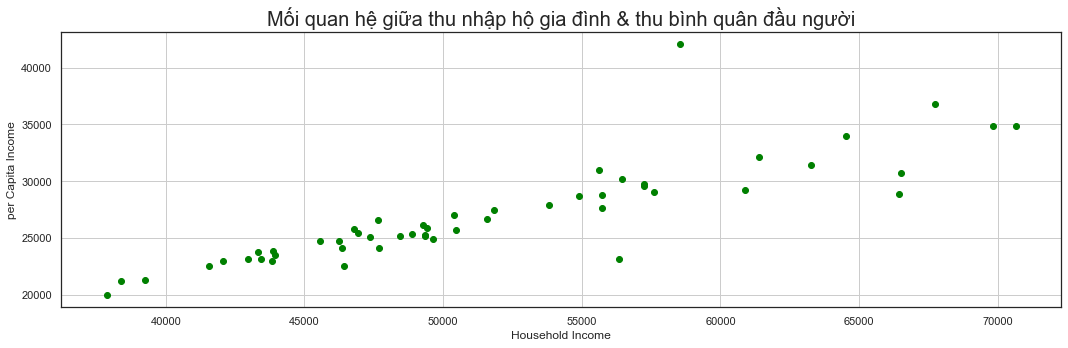

In [61]:
#setup
fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,5)) 

xs = df['HH Inc']
ys = df['Per Cap Inc']

# Plot
ax1.scatter(xs,ys, color ='green')

plt.xlabel("Household Income")
plt.ylabel("per Capita Income")
plt.title('Mối quan hệ giữa thu nhập hộ gia đình & thu bình quân đầu người', fontsize= 20)
plt.grid()
plt.tight_layout()
plt.show()
 

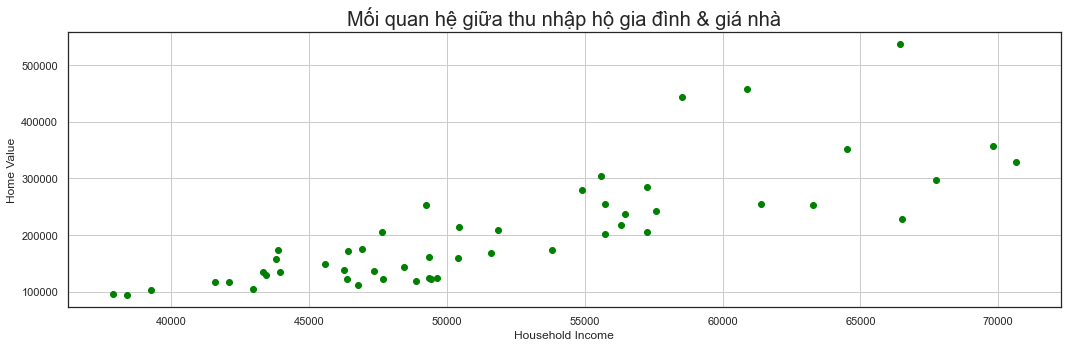

In [62]:
#setup
fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,5)) 

xs = df['HH Inc']
ys = df['Home Value']

# Plot
ax1.scatter(xs,ys, color ='green')

plt.xlabel("Household Income")
plt.ylabel("Home Value")
plt.title('Mối quan hệ giữa thu nhập hộ gia đình & giá nhà', fontsize= 20)
plt.grid()
plt.tight_layout()
plt.show()

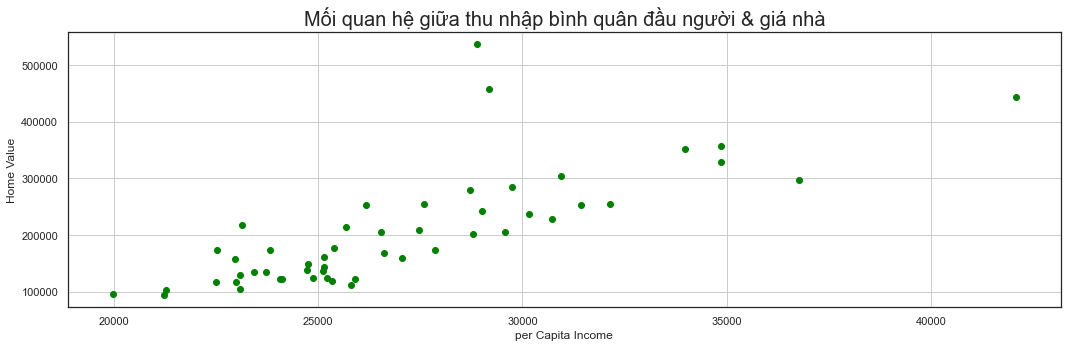

In [63]:
#setup
fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(15,5)) 

xs = df['Per Cap Inc']
ys = df['Home Value']

# Plot
ax1.scatter(xs,ys, color ='green')

plt.xlabel("per Capita Income")
plt.ylabel("Home Value")
plt.title('Mối quan hệ giữa thu nhập bình quân đầu người & giá nhà', fontsize= 20)
plt.grid()
plt.tight_layout()
plt.show()

## Calculate Correlation Coefficient

In [64]:
df3 = df[['Home Value','HH Inc','Per Cap Inc','Pct Owner Occ']]

In [65]:
df3.corr()

,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
0,,,,
Home Value,1.000000,0.803462,0.766173,-0.659473
HH Inc,0.803462,1.000000,0.858159,-0.339409
Per Cap Inc,0.766173,0.858159,1.000000,-0.531749
Pct Owner Occ,-0.659473,-0.339409,-0.531749,1.000000


## Trình bày bảng dữ liệu có được ở bước 1 thể hiện gì về mức độ tập trung và sự phần phối dữ liệu của từng biến (the central tendency, variability and distribution of each variable). 

### a) Trình bày bảng dữ liệu có được ở bước 1 thể hiện gì về mức độ tập trung và sự phần phối dữ liệu của từng biến (the central tendency, variability and distribution of each variable). 

### b) Trình bày các frequency histograms ở bước 2 và các boxplots ở bước 3 hỗ trợ và giúp làm rõ các nhận được ở bước 1 như thế nào. Từ bước 1 và bước 2, hãy tìm ra các outliers đối với từng biến.


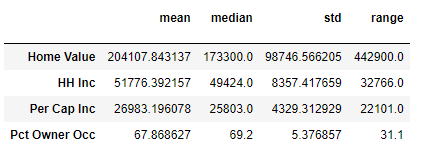 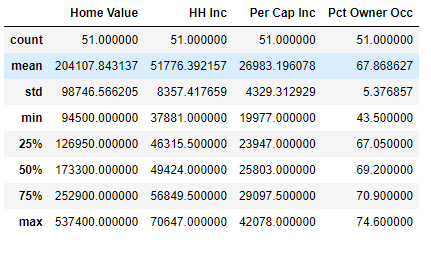

#### Home Value

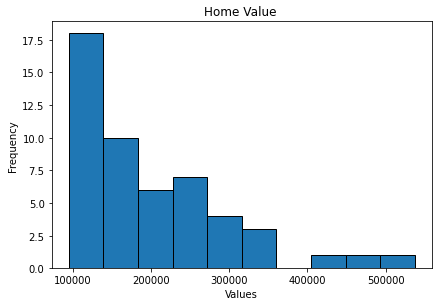 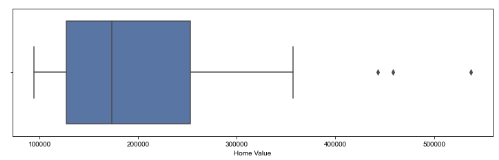

Giá nhà có giá trị trung bình là 204,107.84, trung vị là 173,300 (mean < median)
- Nhà có giá rẻ nhất: 94,500; nhà có giá đắt nhất: 537,400
- Dựa vào histogram, có thể thấy dữ liệu phân bố không đối xứng & lệch phải (right-skewed). Nói cách khác, dữ liệu được phân bổ phần lớn ở các giá trị thấp.
- Ở 51 bang, hơn 1 nửa dữ liệu về giá nhà ghi nhận được ở mức giá từ dưới 100,000 đến dưới 300,000
- Dựa vào Box plot, giá nhà trung bình phần lớn trong khoảng từ ~150,000 đến 250,000
- có thể nhận ra 3 outliers (giá nhà cao) với các giá trị lần lượt là 443,300; 458,500; 537,400

#### Household Income

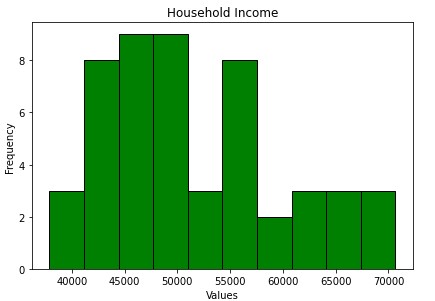 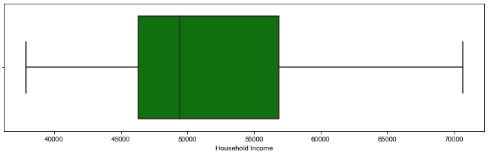

Thu nhập hộ gia đình có giá trị trung bình là 51,776.39, trung vị là 49,424 (mean < median)
- Hộ gia đình có thu nhập thấp nhất: 37,881 ; Hộ gia đình có thu nhập cao nhất: 70,647
- Dựa vào histogram, có thể thấy dữ liệu phân bổ có dạng xấp xỉ đối xứng, hơi lệch phải (right-skewed). 
- Ở 51 bang, thu nhập hộ gia đình phần lớn là dưới 55,000. Hơn 1 nửa hộ gia đình có thu nhập dưới mức trung bình (<51,000)
- Dựa vào Box plot, thu nhập của 1 hộ gia đình phần lớn trong khoảng từ ~47,000 đến 57,500
- không có outliers nào 

#### Income per Capita

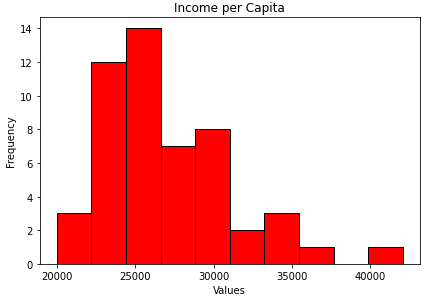 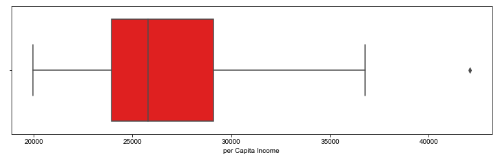

Thu nhập bình quân đầu người có giá trị trung bình là 26,983.2, trung vị là 25,803 (mean > median)
- Thu nhập bình quân đầu người thấp nhất: 19,977 ; Thu nhập bình quân đầu người cao nhất: 42,078
- Dựa vào histogram & box plot, có thể thấy dữ liệu phân bổ có dạng lệch phải (right-skewed). 
- Ở 51 bang, hơn 1 nửa dữ liệu thu thập được có thu nhập bình quân dưới mức trung bình (26,983.2) 
- Dựa vào Box plot, thu nhập bình quân đầu người phần lớn trong khoảng gần 25,000 đến dưới 30,000
- có 1 outlier có thu nhập bình quân đầu người rất cao là 42,078

#### Percentage of homes that are owner occupied

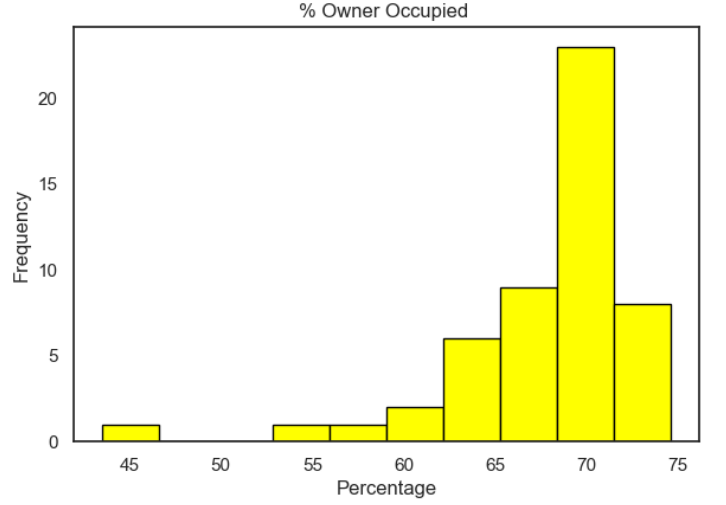 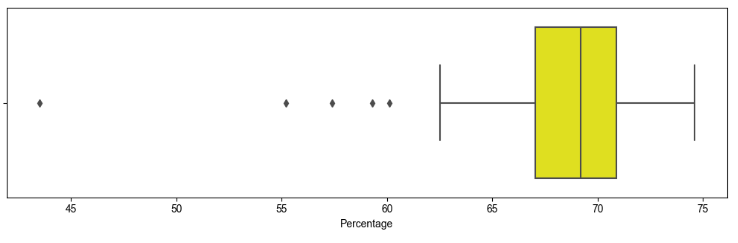

% số nhà có chủ sở hữu có giá trị trung bình là 67.87%, trung vị là 69.2% (mean < median)
- Dựa vào histogram & box plot, có thể thấy dữ liệu phân bổ có dạng lệch trái (left-skewed). 
- Ở 51 bang, phần lớn các ngôi nhà đều có chủ sở hữu (>60%)
- Dựa vào Box plot, tỉ lệ các nhà có chủ sở hữu trong khoảng từ 68% đến 73%
- có 5 outliers có tỉ lệ các nhà có chủ sở hữu rất thấp (thấp hơn nhiều so với tỉ lệ trung bình 67.87%): 43.5%; 55.2%; 57.4%; 59.3%; 60.1%

## c/Trình bày các biểu đồ scatterplots ở bước 4 và correlation coefficients ở bước 5 thể hiện gì về mối quan hệ giữa các cặp biến (Ví dụ: các biến có quan hệ với nhau không?, các mối quan hệ đó có vẻ là tuyến tính (linear) hay phi tuyến tính (nonlinear)?, các mối quan hệ đó là tương quan đồng biến hay nghịch biến (positive or negative)?.




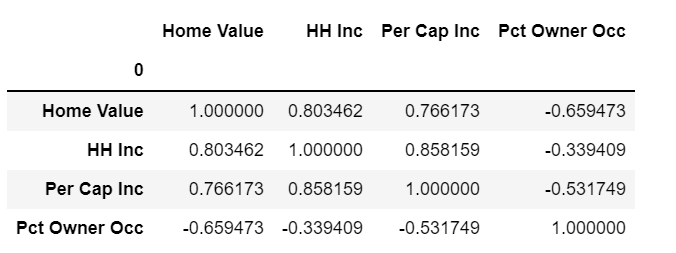

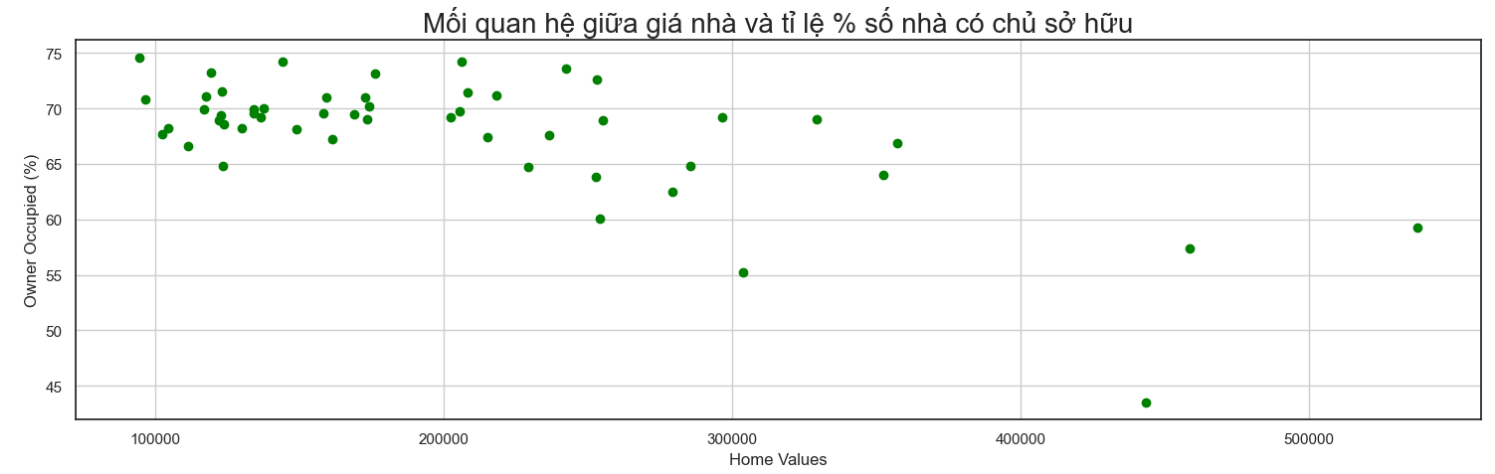
- Dựa vào Scatter Plot & Correlation Coefficient, có thể thấy không có mối liên hệ giữa giá nhà & tỉ lệ % số nhà có chủ sở hữu (corrcoef = -0.66 (negative)). 

- Biểu đồ scatter cũng cho thấy data phân bổ rời rạc, các điểm phân tán rộng, thể hiện không có sự liên hệ giữa 2 variables

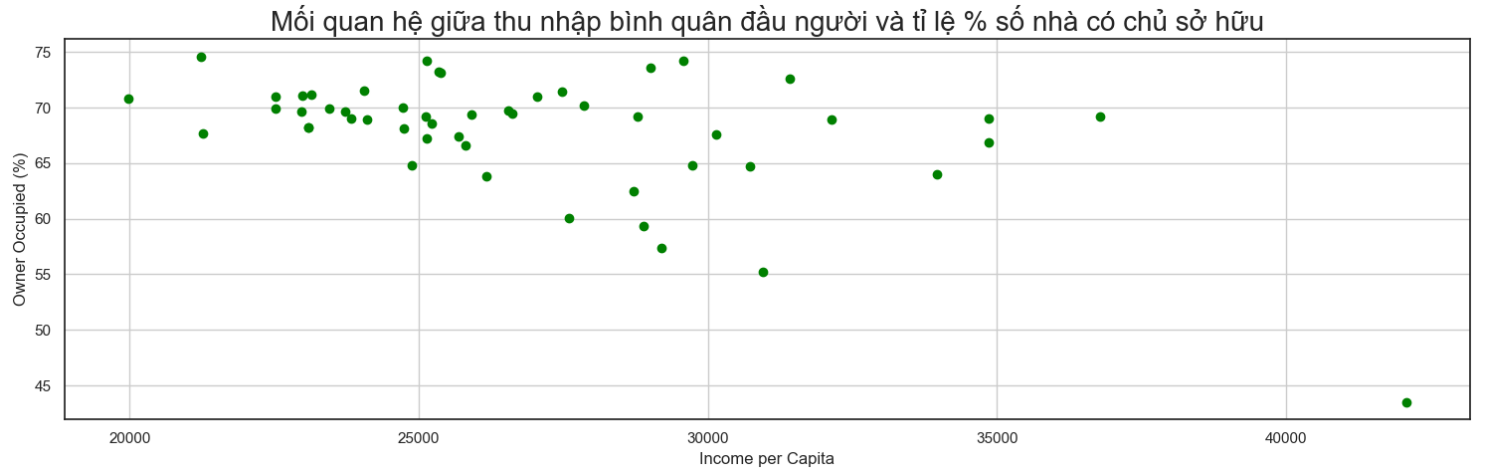

Tương tự như vậy, với corrcoef = -0.53 (negative) & data phân bố rời rạc, các điểm phân tán rộng, có thể kết luận không có mối liên hệ giữa thu nhập bình quân đầu người & tỉ lệ số nhà có chủ sở hữu

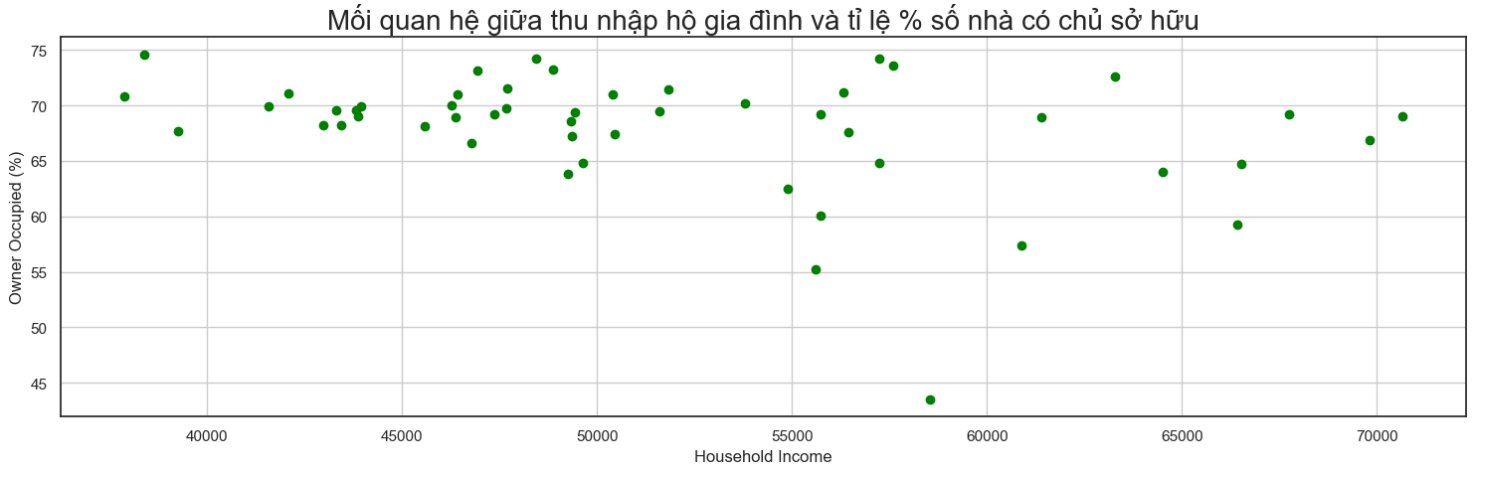

Với corrcoef = -0.33 (negative) & data points tập trung theo đường tuyến tính đi xuống, có thể kết luận mối liên hệ giữa thu nhập bình quân đầu người và tỉ lệ % số nhà có chủ sở hữu là yếu 

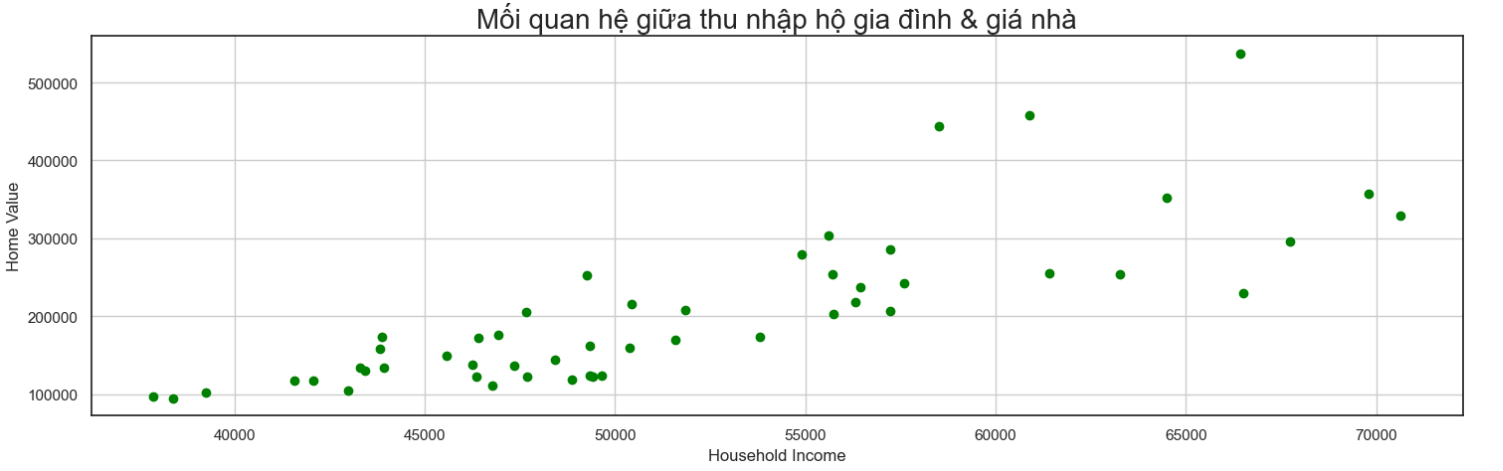

Có thể thấy có mối liên hệ mạnh giữa thu nhập hộ gia đình & giá nhà (positive relation với corrcoef = 0.8). Phần lớn các data points, khi thu nhập hộ gia đình tăng thì giá nhà cũng tăng. Phần lớn các data points tập trung theo 1 đường thẳng đi lên, thể hiện mối liên hệ mạnh & positive giữa 2 variables này

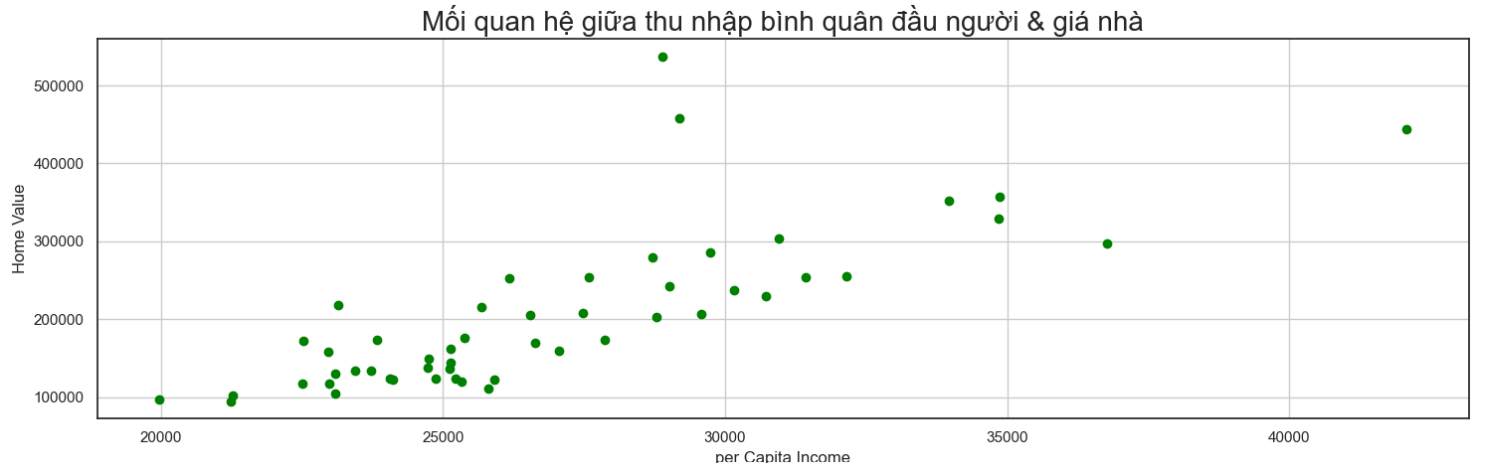
Tương tự như trên, mối liên hệ giữa thu nhập bình quân đầu người & giá nhà mạnh (tuyến tính dương với corrcoef = 0.76). Khi thu nhập bình quân đầu người tăng, giá nhà cũng có xu hướng tăng

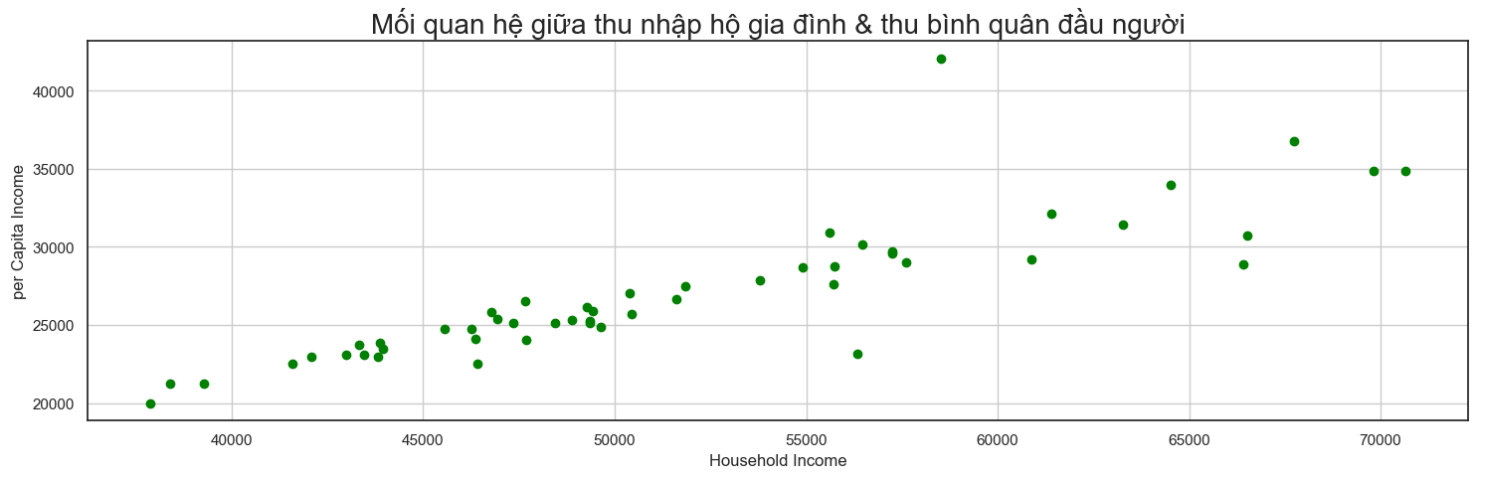
Cuối cùng, mối liên hệ giữa thu nhập hộ gia đình & thu nhập bình quân đầu người là mối liên hệ mạnh (tuyến tính dương với corrcoef = 0.86). Điều này khá rõ ràng và dễ hiểu khi thu nhập của từng thành viên trong gia đình cao, thì kéo theo thu nhập của hộ gia đình cũng tăng lên.

## d/Trong các biến HH Inc , Per Cap Inc và Pct Owner Occ thì biến nào có mối quan hệ mạnh nhất với Home Value?

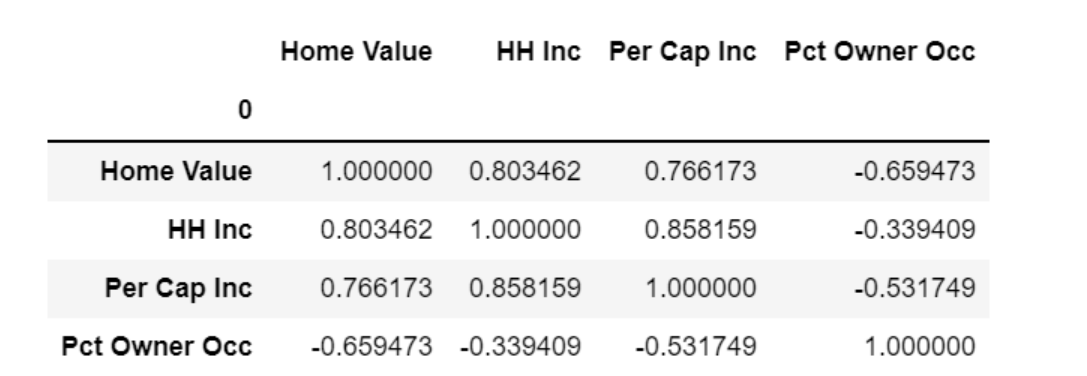

## Dựa vào bảng Correlation Coefficient, có thể thấy variable thu nhập hộ gia đình (Household Income) có mối liên hệ mạnh nhất với Home Value